# EDA for NIRF Ranking Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
directory = "./Datasets/Nirf"

engg = {}
overall = {}

for i in ['2016','2017','2018','2019','2020','2021']:
  try:
    data_engg = pd.read_csv(directory+f"/{i}/EngineeringRanking_{i}.csv", encoding='unicode_escape')
    engg[i]=data_engg
  except:
    pass
  
  try:
    data_overall = pd.read_csv(directory+f"/{i}/OverallRanking_{i}.csv",encoding="unicode_escape")
    overall[i]=data_overall
  except:
    pass 

## Notation

link for the nirf parameter definitions : <a href="https://www.nirfindia.org/Parameter">https://www.nirfindia.org/Parameter</a>

- Rank: Ranking Given by NIRF
- Score: Overall Score
- TLR: Teaching, Learning & Resources
- RPC: Research and Professional Practice 
- GO: Graduation Outcomes
- OI: Outreach and Inclusivity
- Perception: Peer and Employer Perception

# Statistics for Overall

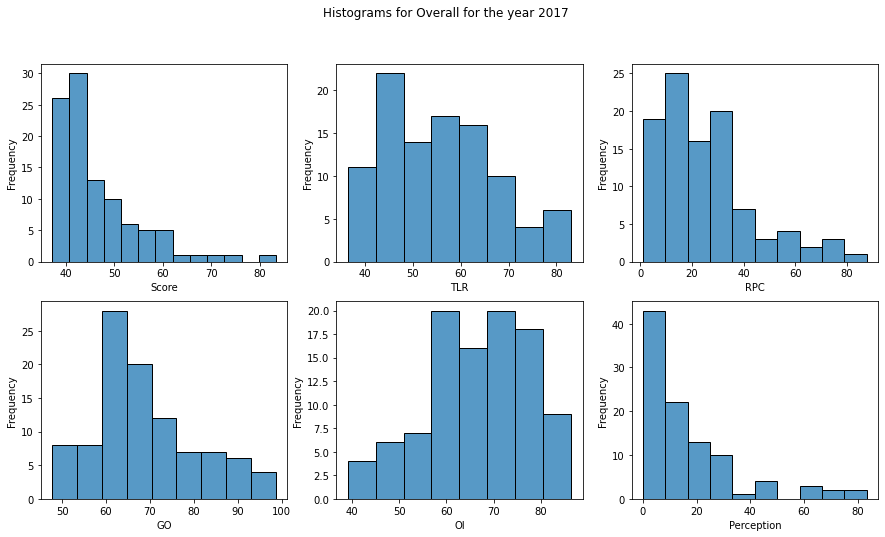

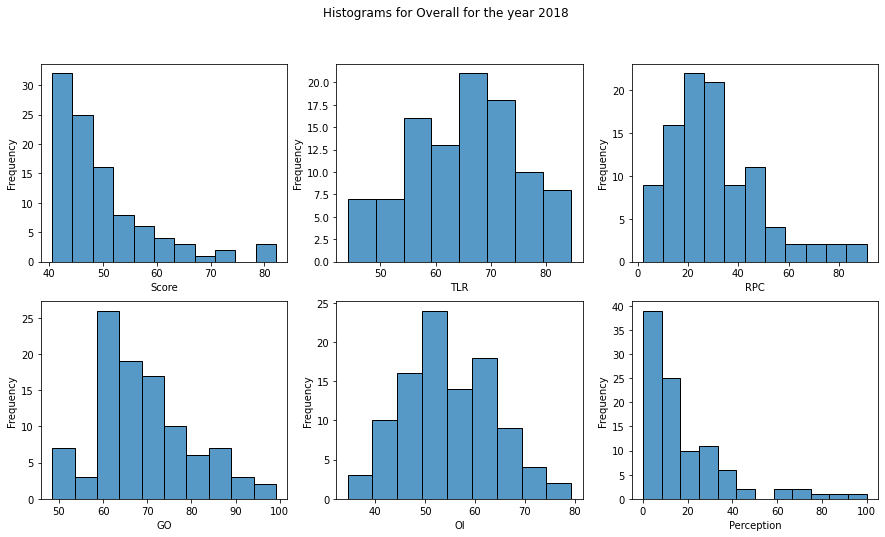

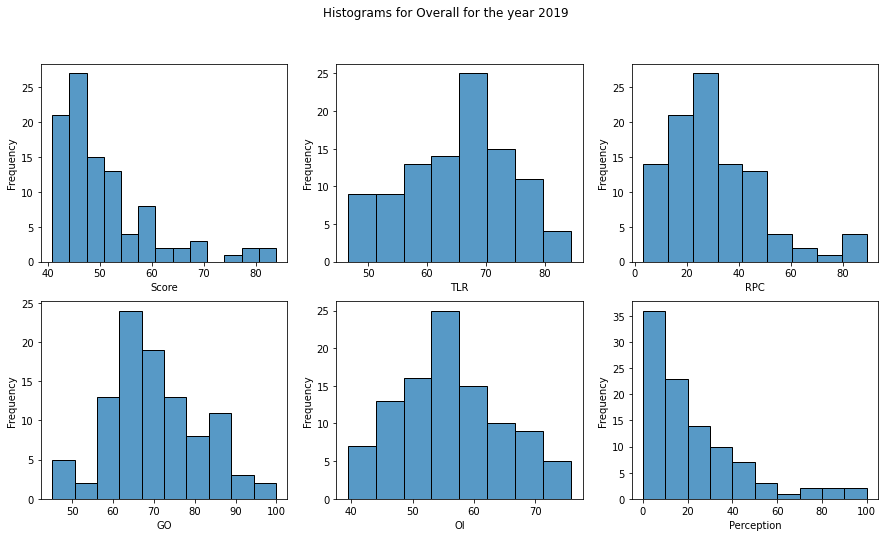

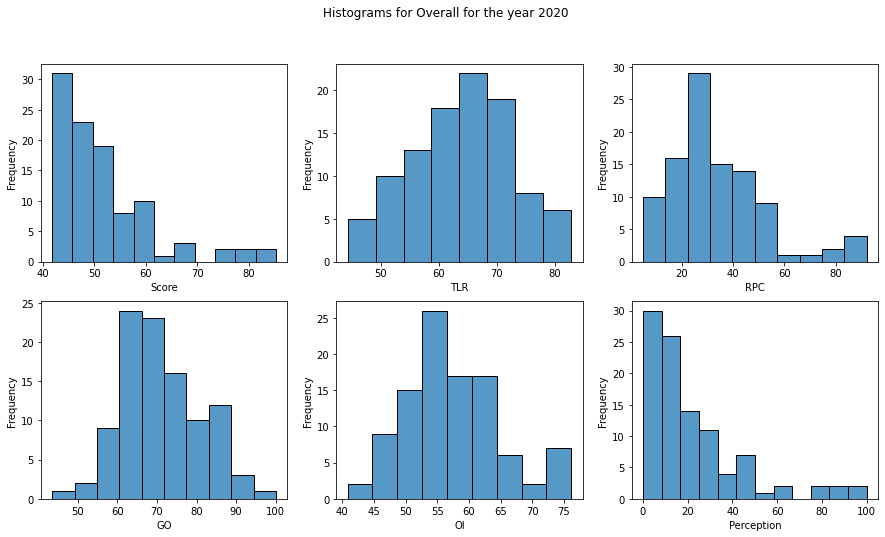

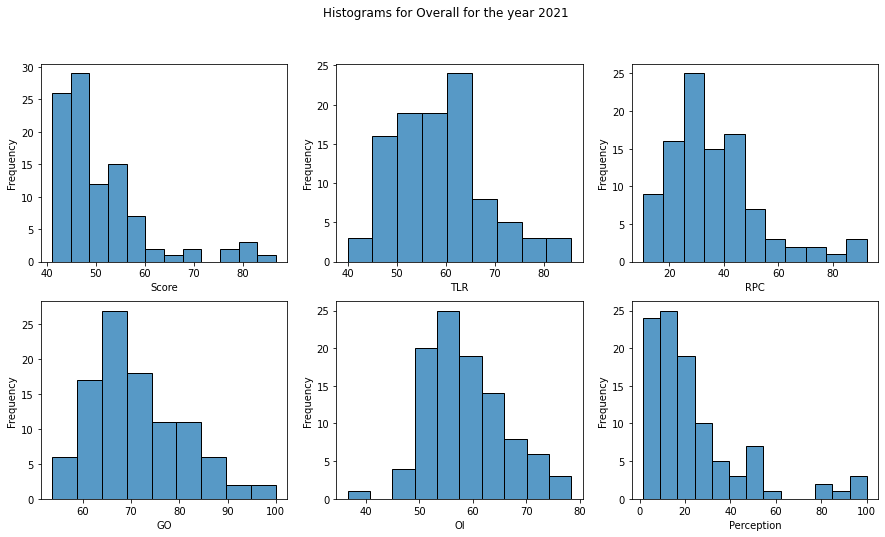

In [3]:
meanstddf = []
plt.rcParams["figure.figsize"] = (15,8)
for k in overall.keys():
  data = overall[k]
  cols=['Score','Rank','TLR','RPC','GO','OI','Perception']
  stat_data = data[cols]
  cols =['Score','TLR','RPC','GO','OI','Perception']
  plt.figure()
  currdata={}
  currdata['year'] = k
  plt.suptitle(f"Histograms for Overall for the year {k}")
  for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.histplot(stat_data[cols[i]], bins='auto')
    plt.xlabel(f"{cols[i]}")
    plt.ylabel(f"Frequency")
    currdata[f"Mean of {cols[i]}"] = np.average(np.array(stat_data[cols[i]]))
    currdata[f"Std of {cols[i]}"] = np.std(np.array(stat_data[cols[i]]))
  plt.show()
  meanstddf += [currdata]

In [4]:
meanstddf = pd.DataFrame(meanstddf)
display(meanstddf)

,year,Mean of Score,Std of Score,Mean of TLR,Std of TLR,Mean of RPC,Std of RPC,Mean of GO,Std of GO,Mean of OI,Std of OI,Mean of Perception,Std of Perception
0,2017,46.44990,8.570692,55.781300,11.530204,25.245200,18.245239,68.914300,11.548786,66.5949,10.957101,16.986900,18.644637
1,2018,49.81770,8.963380,65.315400,9.769818,30.477900,18.413971,68.876800,10.536306,54.7820,9.143678,18.256500,19.620778
2,2019,50.81460,9.356872,65.283600,9.124354,31.109600,18.066027,70.082800,11.116533,56.3384,8.509267,22.465200,21.678472
3,2020,51.63495,9.549279,64.096931,8.706835,34.186634,18.218928,71.025743,10.272380,57.4500,7.601463,21.994554,22.072547
4,2021,51.15140,9.764180,59.061800,9.335879,36.468700,17.264020,71.186700,9.375611,58.6717,7.419738,23.884400,21.698968


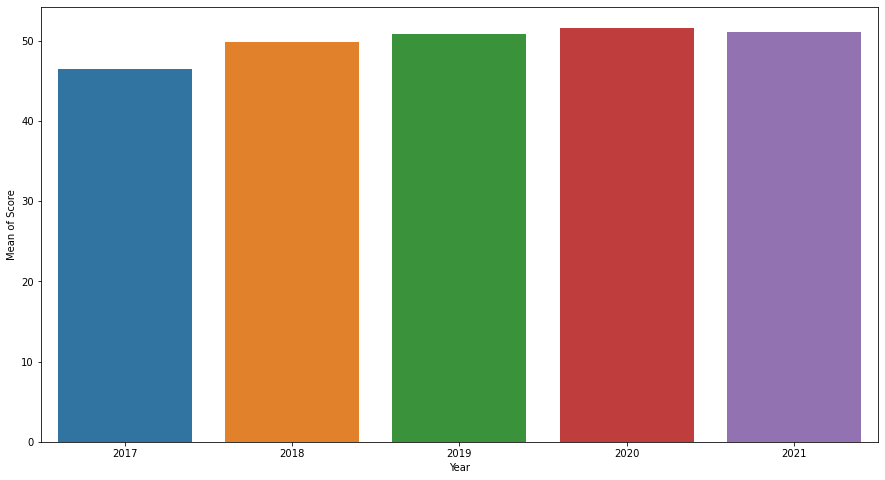

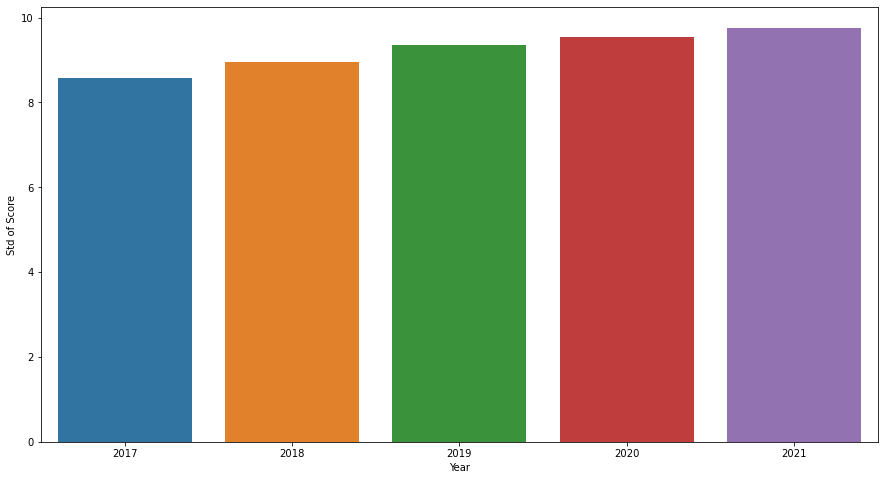

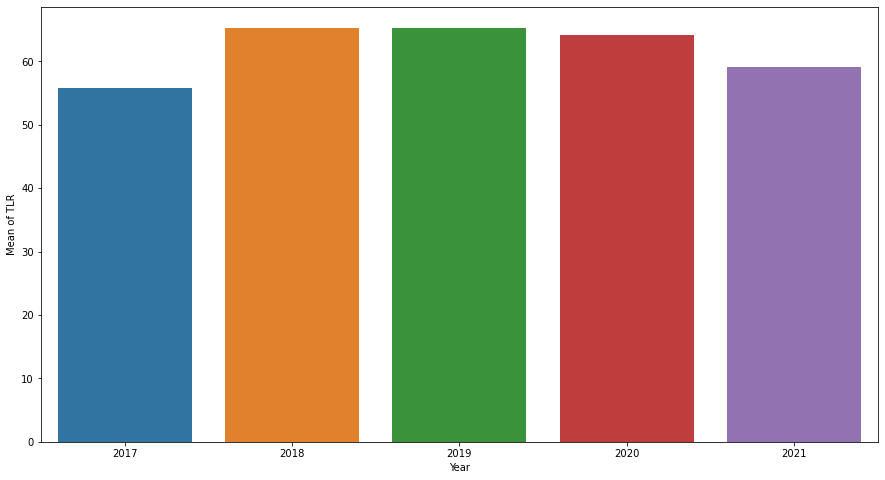

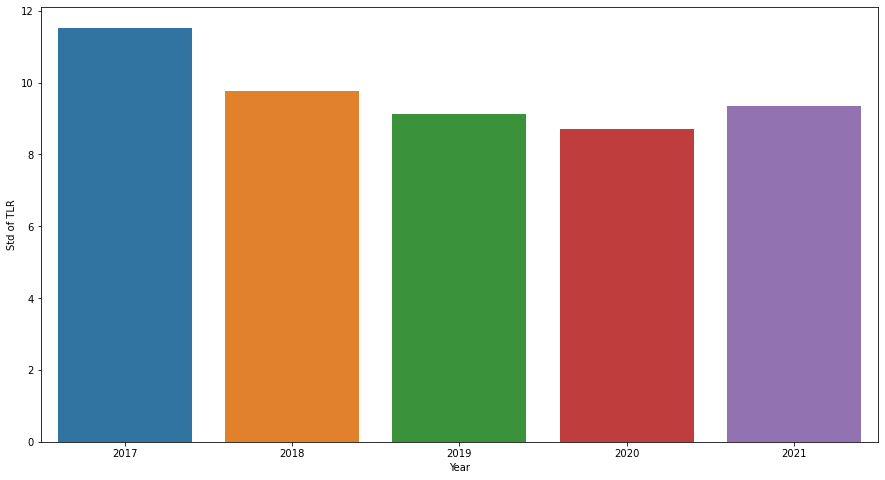

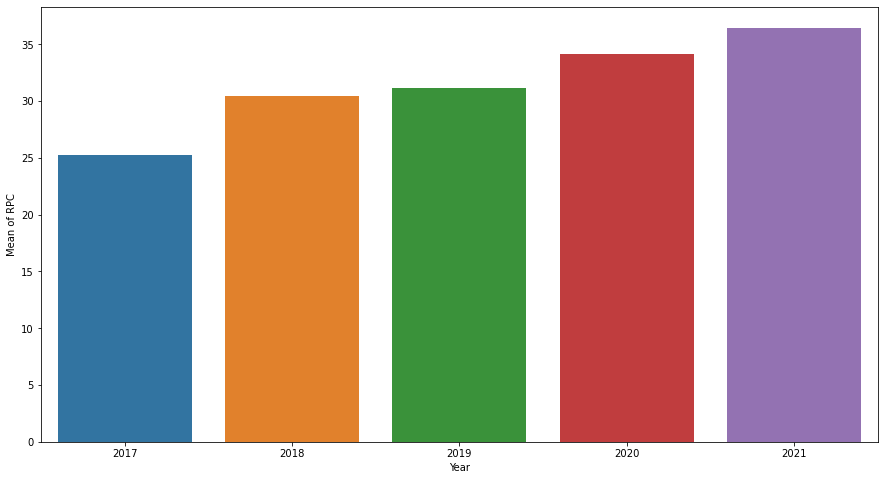

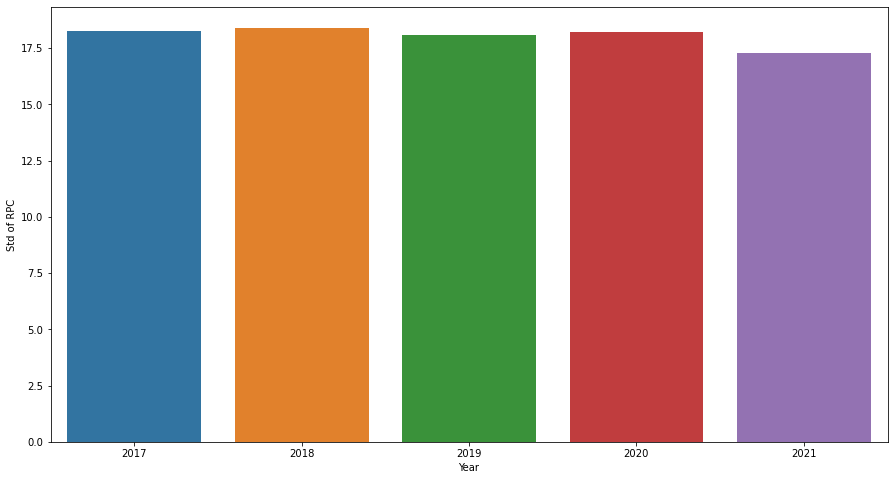

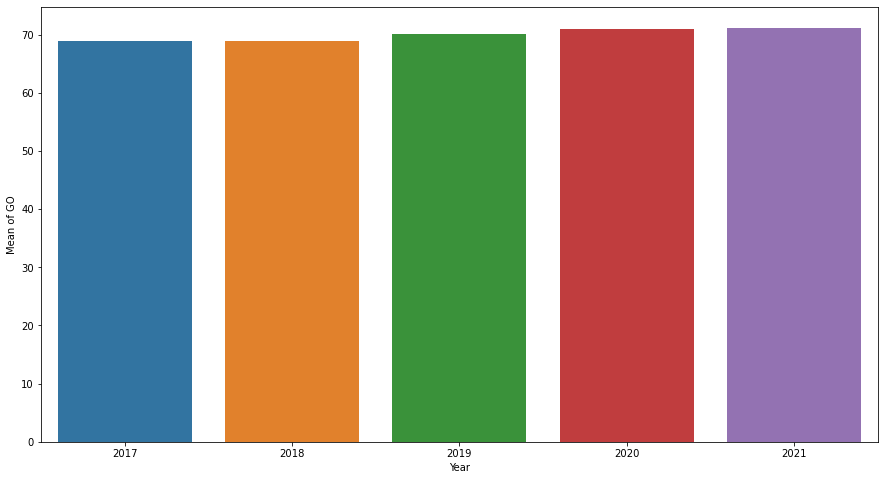

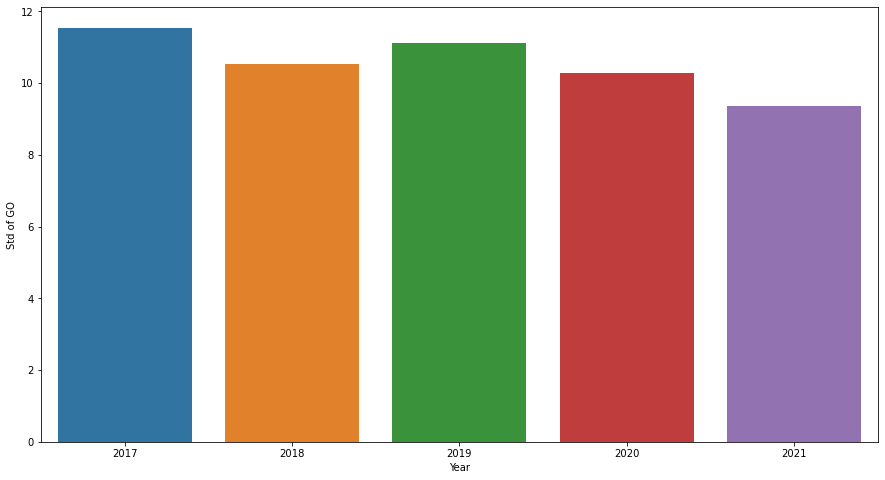

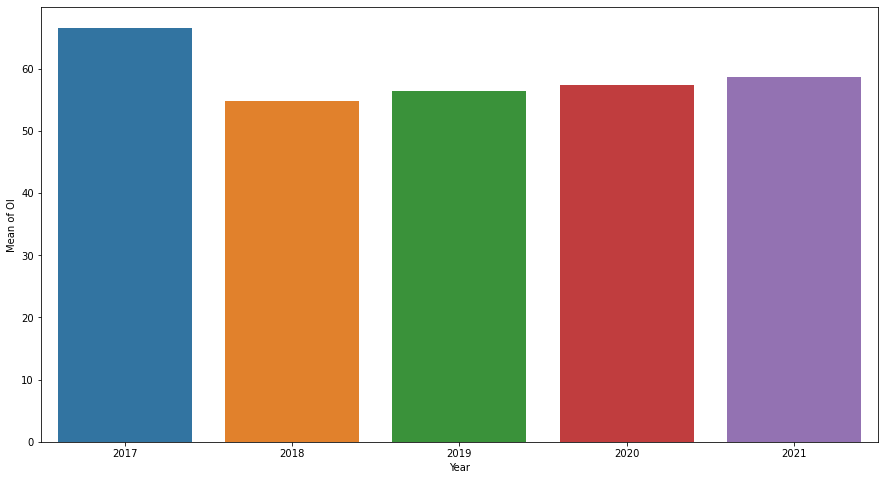

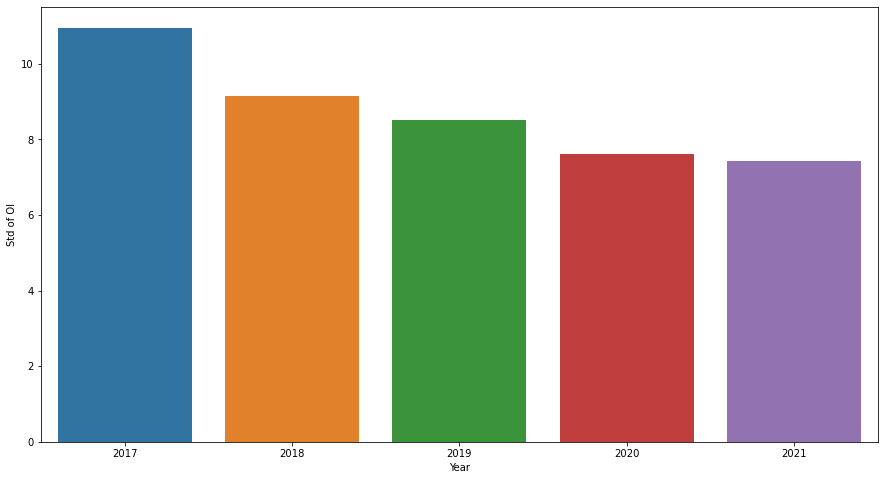

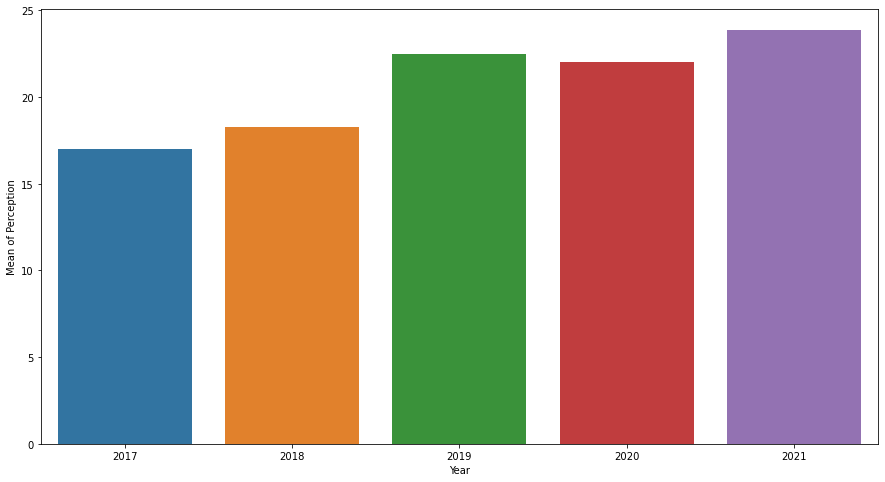

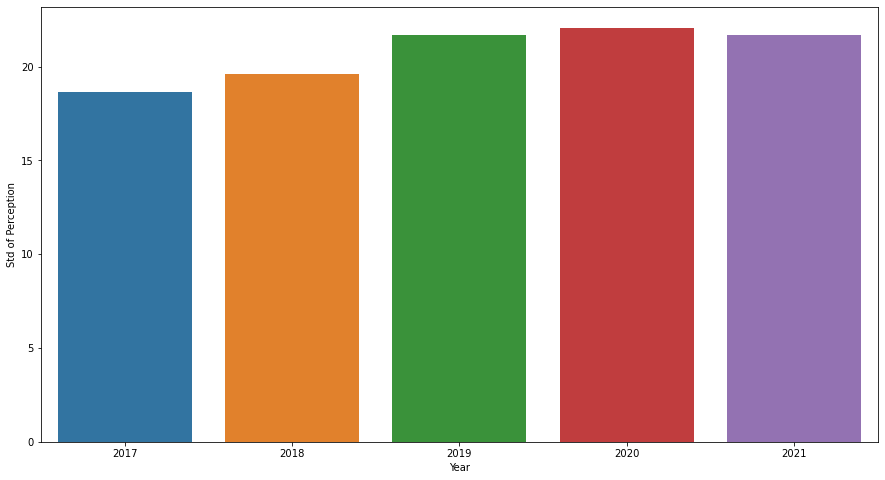

In [5]:
h = [i for i in list(meanstddf.columns) if i!='year']
for i in range(len(h)):
    sns.barplot(x=meanstddf['year'],y=meanstddf[h[i]])
    plt.xlabel("Year")
    plt.ylabel(h[i])
    plt.show()

## Observations
### We can use this to tell average general trends for eg if the avg score is increasing yearly => all colleges are improving
### We can also use stdev to tell whether the variation in growth is not uniform 

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


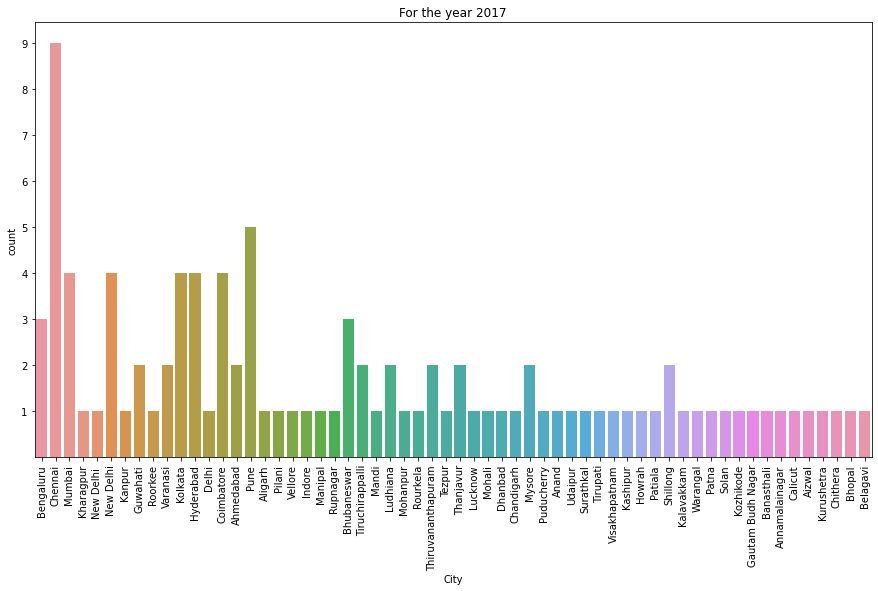

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


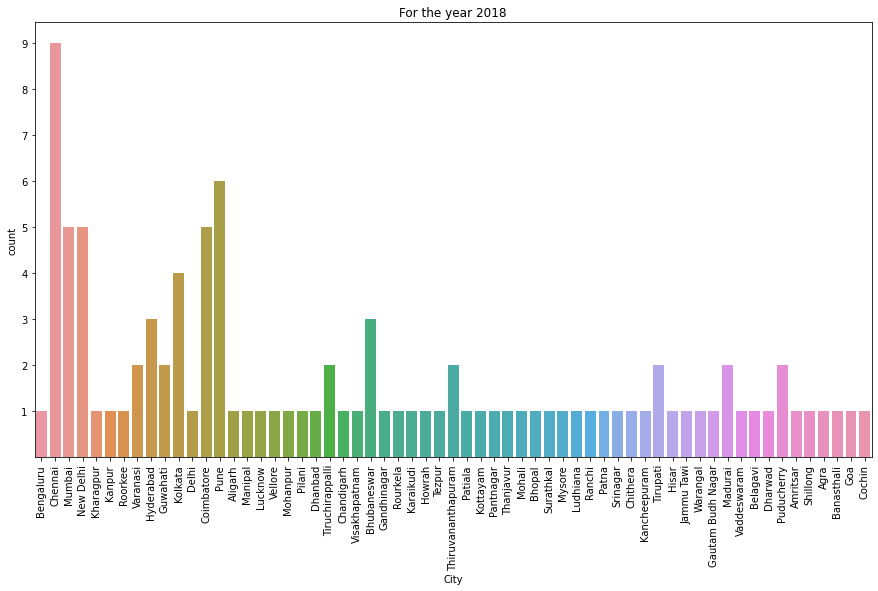

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


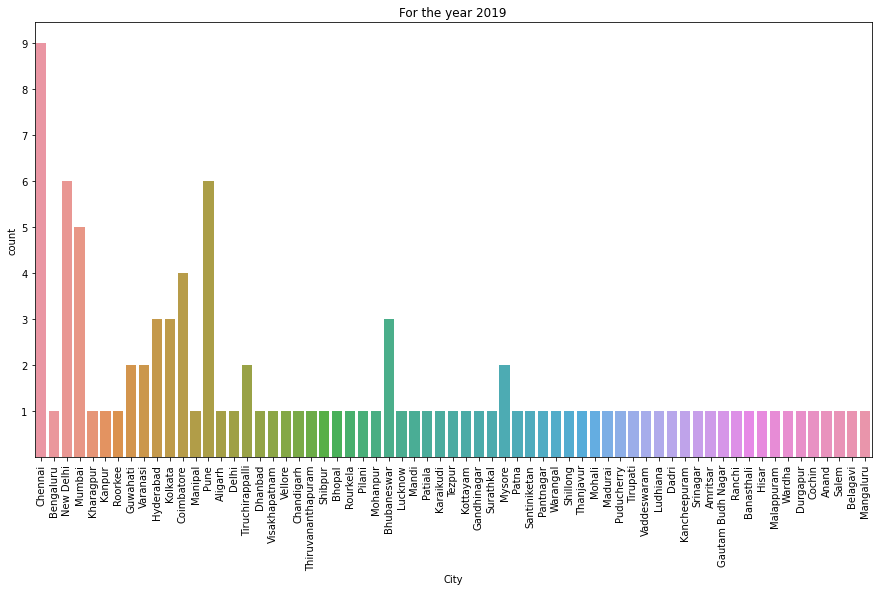

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


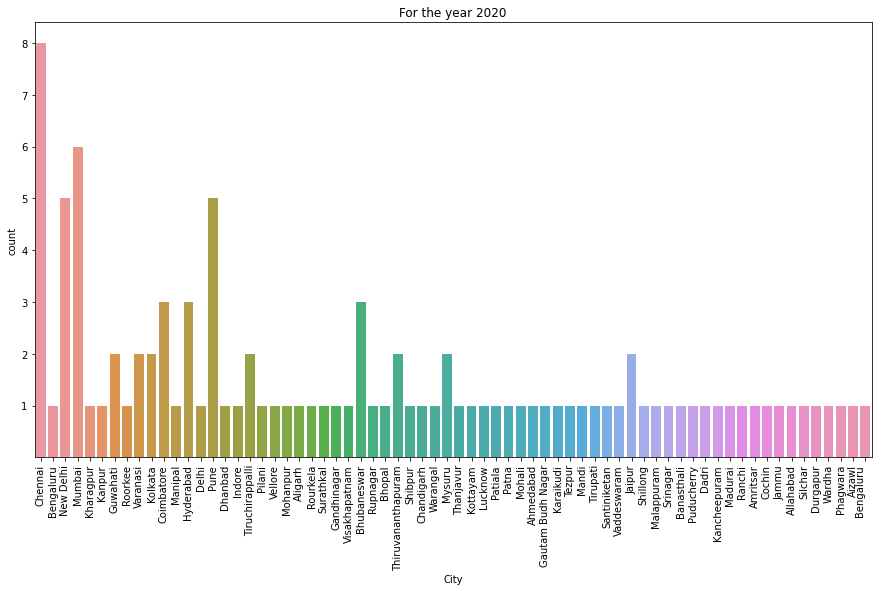

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


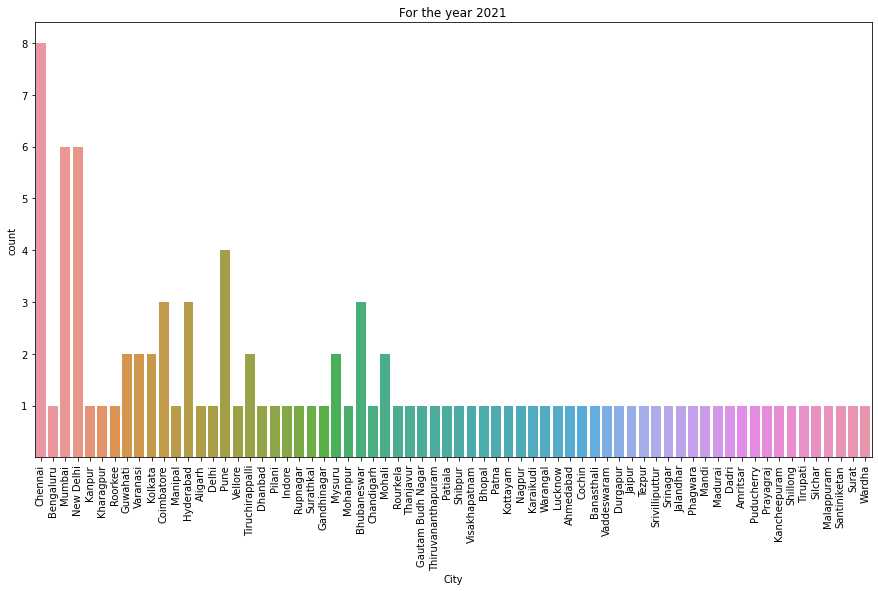

In [6]:
for i in overall.keys():
    val = overall[i]
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,10))
    plt.xlabel("City")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['City'])
    plt.show()

# Majority are in Cities/Metropolitan areas and not in towns and villages

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


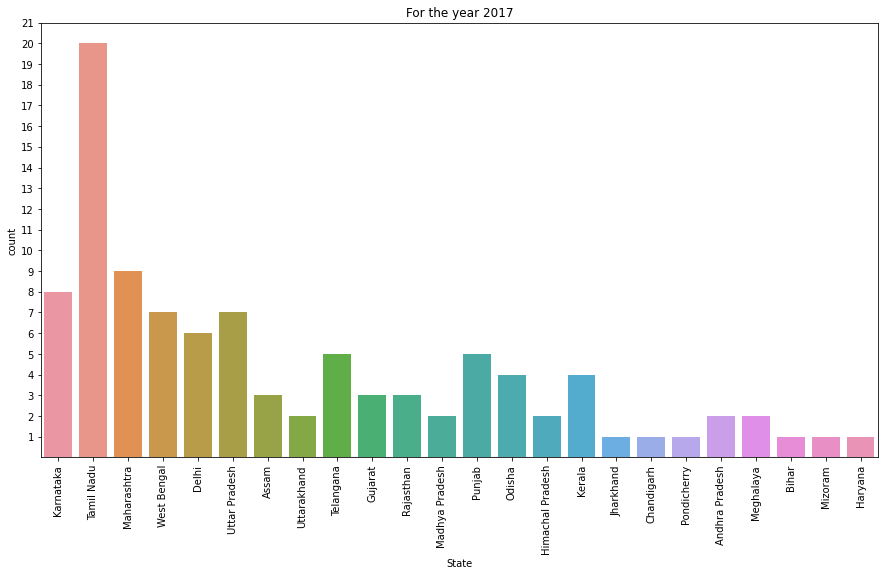

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


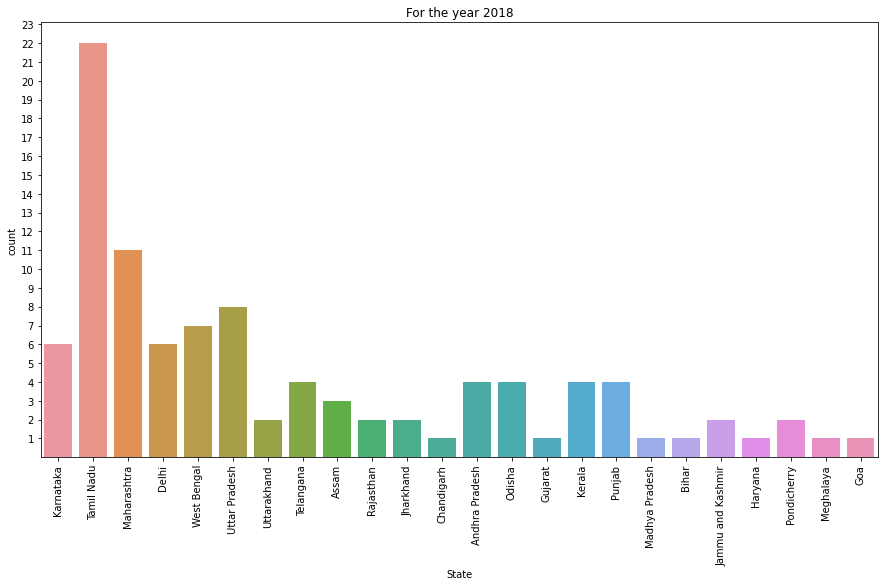

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


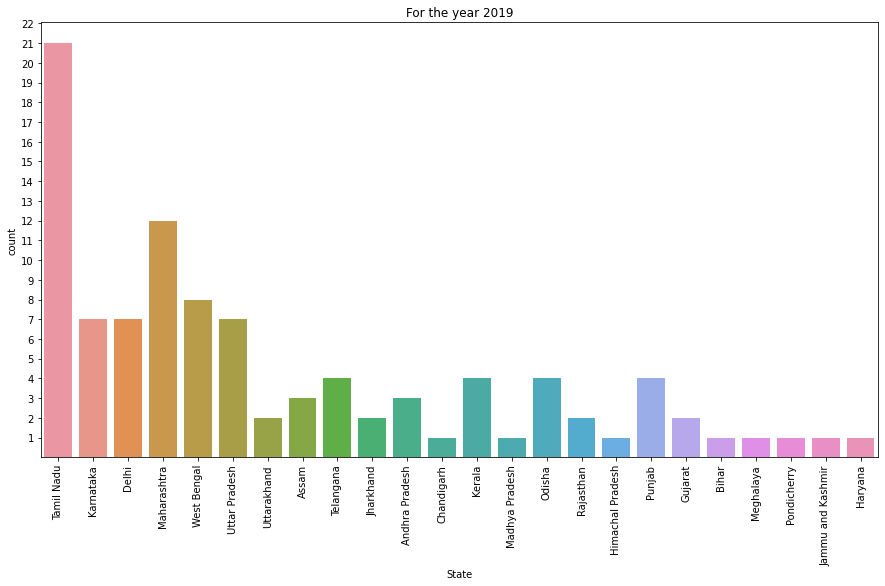

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


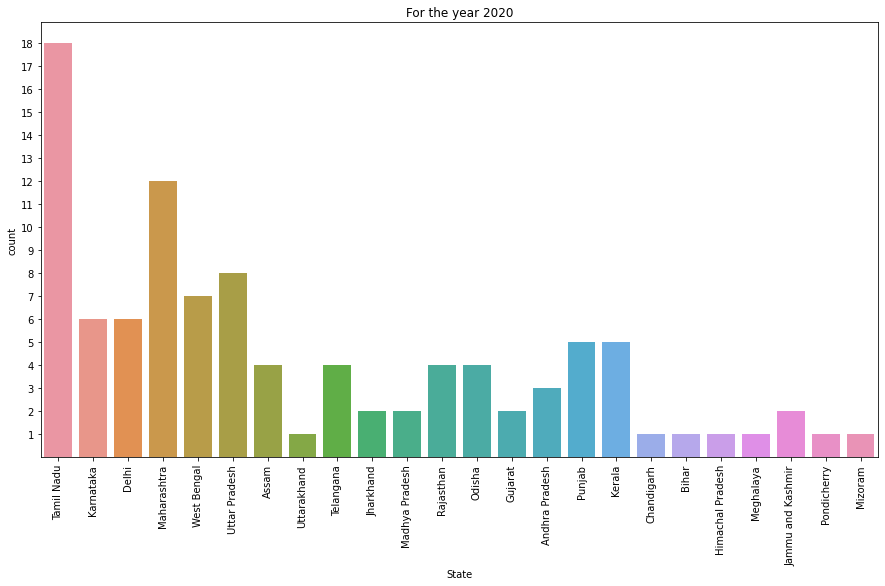

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


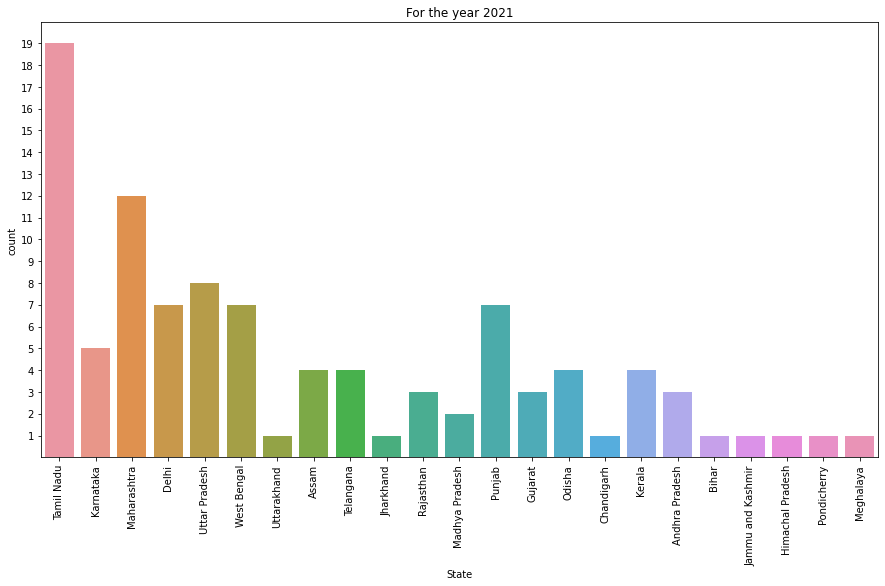

In [7]:
for i in overall.keys():
    val = overall[i]
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,36))
    plt.xlabel("States")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['State'])
    plt.show()

# Tamilnadu, Maharashtra and UP, Punjab have a major stake

In [8]:
data = pd.DataFrame()
for i in overall.keys():
    curr = overall[i].assign(year=i)
    data = pd.concat([data,curr], axis=0)


In [9]:
top10data = data.query('Rank<=10')

In [10]:
display(top10data.head(5))

,Institute Id,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,IR17-I-2-18243,Indian Institute of Science Bangalore,Bengaluru,Karnataka,83.28,1,83.11,87.59,87.97,61.48,83.33,2017
1,IR17-I-1-1-77,Indian Institute of Technology Madras,Chennai,Tamil Nadu,73.97,2,69.49,72.60,84.02,76.75,68.70,2017
2,IR17-I-2-18633,Indian Institute of Technology Bombay,Mumbai,Maharashtra,71.78,3,64.68,78.14,70.07,65.80,83.44,2017
3,IR17-I-2-18630,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,68.43,4,55.07,70.46,85.11,72.85,64.72,2017
4,IR17-I-2-1-79,Indian Institute of Technology Delhi,New Delhi,Delhi,64.18,5,55.45,68.48,65.92,68.69,69.53,2017


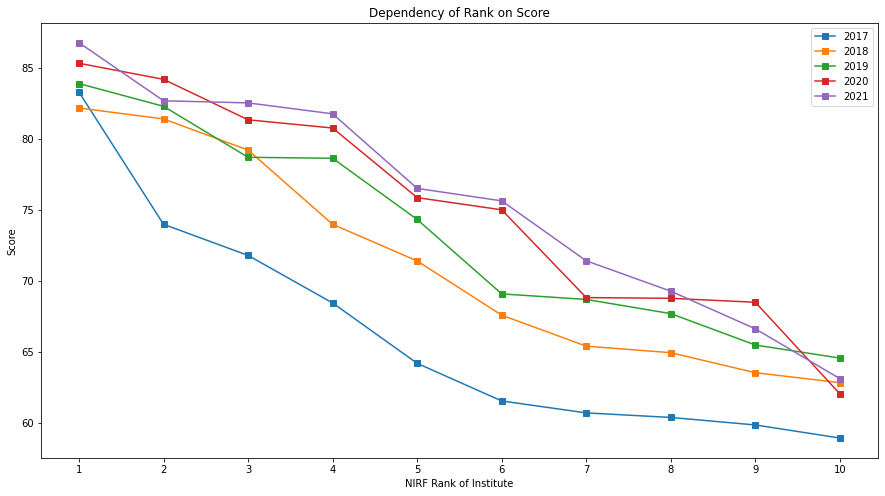

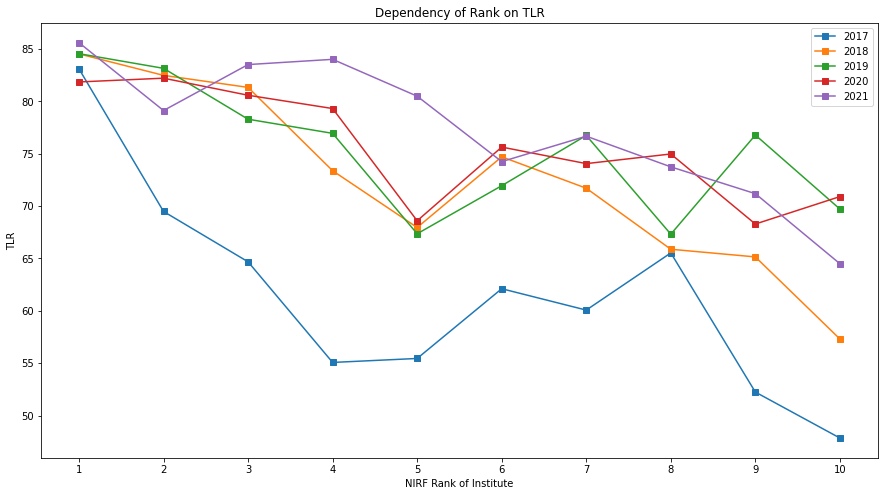

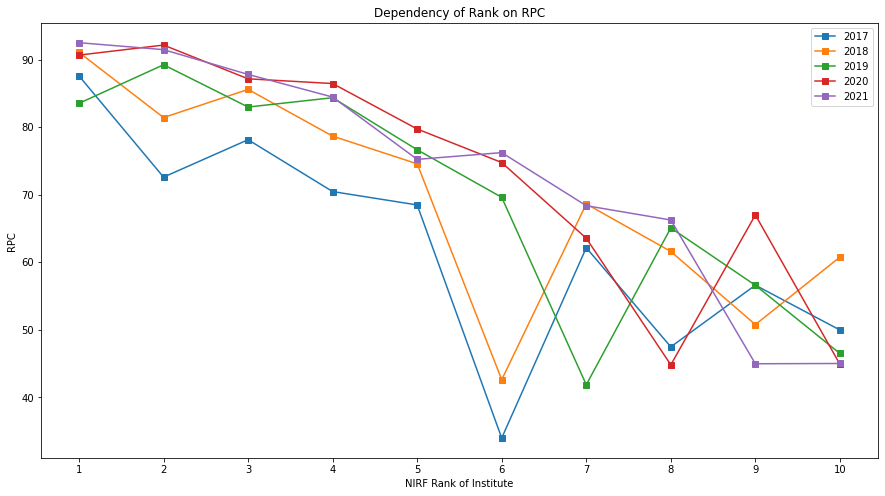

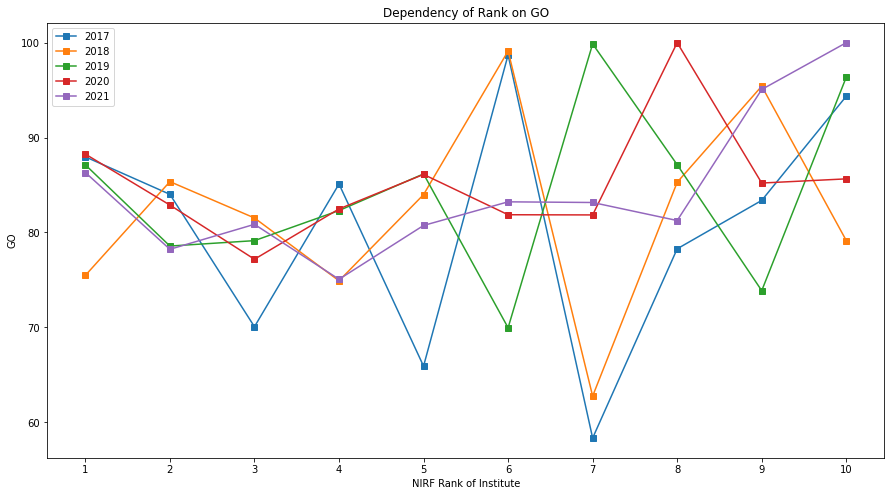

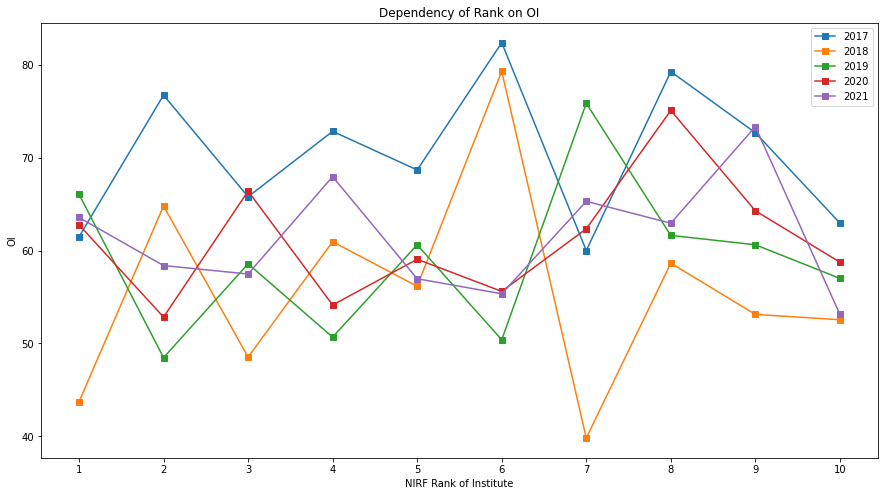

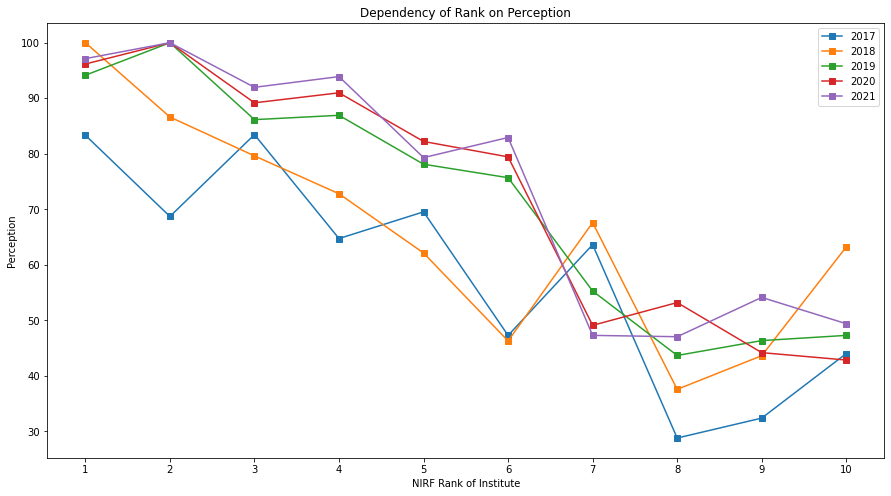

In [11]:
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in top10data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'s-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank of Institute")
    plt.xticks(range(1,11))
    plt.legend()
    plt.show()

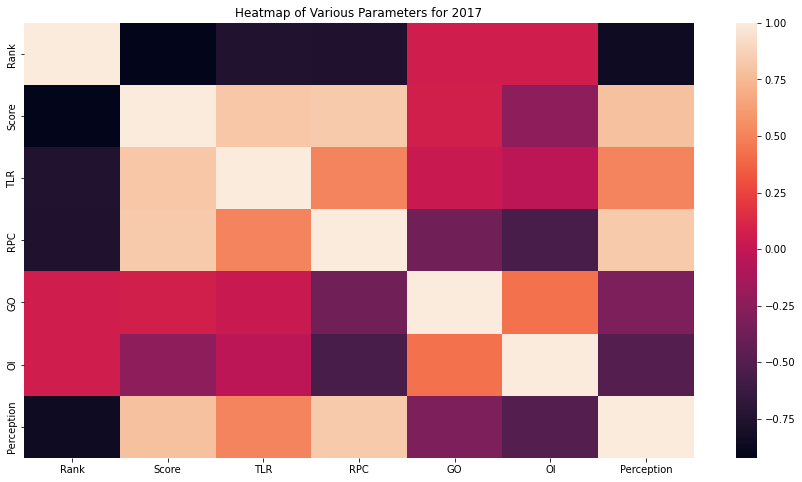

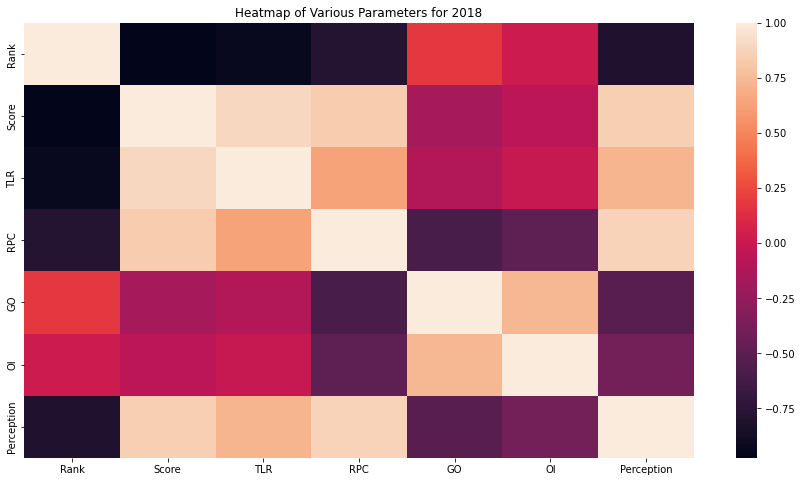

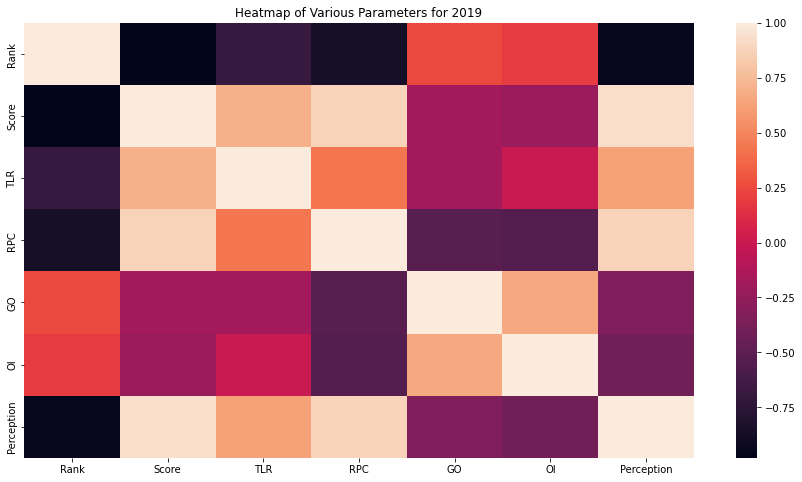

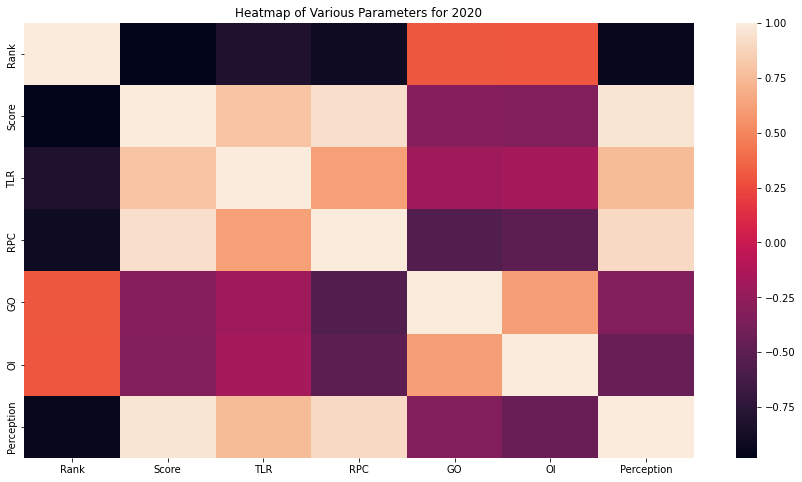

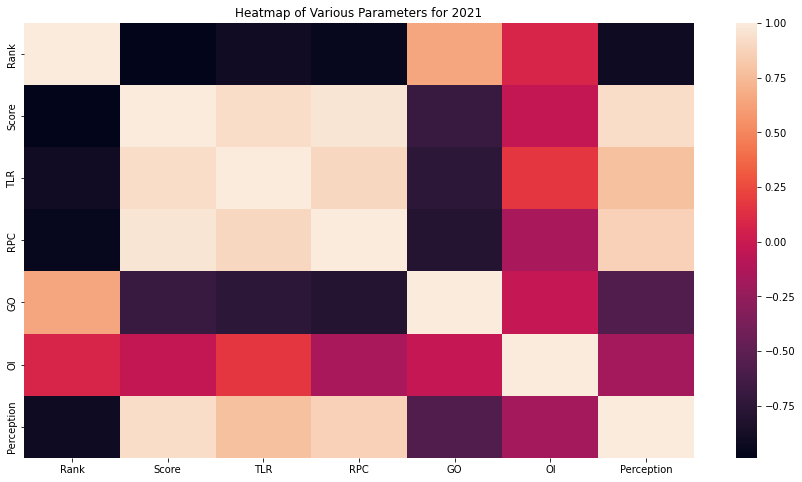

In [12]:
k=['Rank','Score','TLR','RPC','GO','OI','Perception']
for i,j in top10data.groupby('year'):
    plt.title(f"Heatmap of Various Parameters for {i}")
    sns.heatmap(j[k].corr())
    plt.show()

# Yearly trends for top 10 overall in NIRF 2021

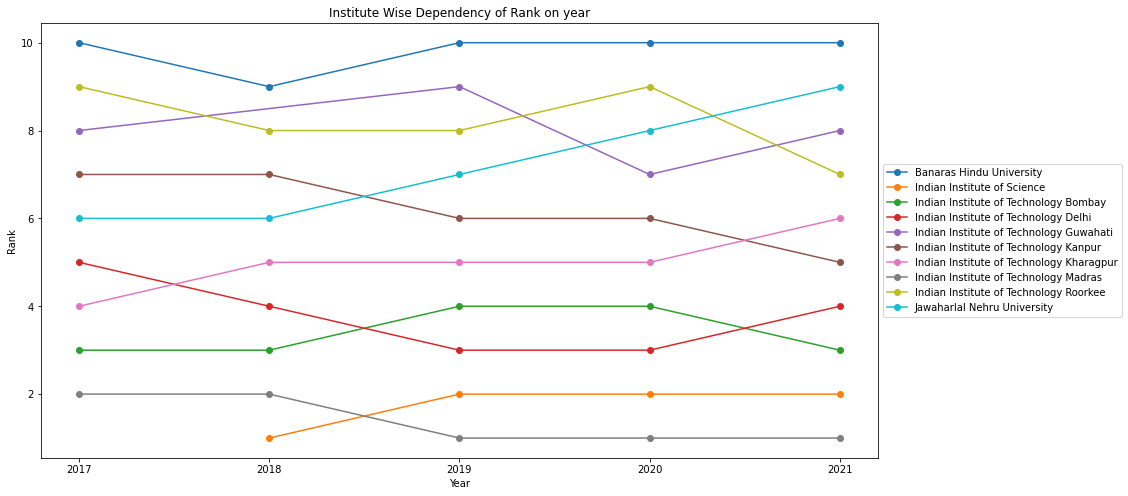

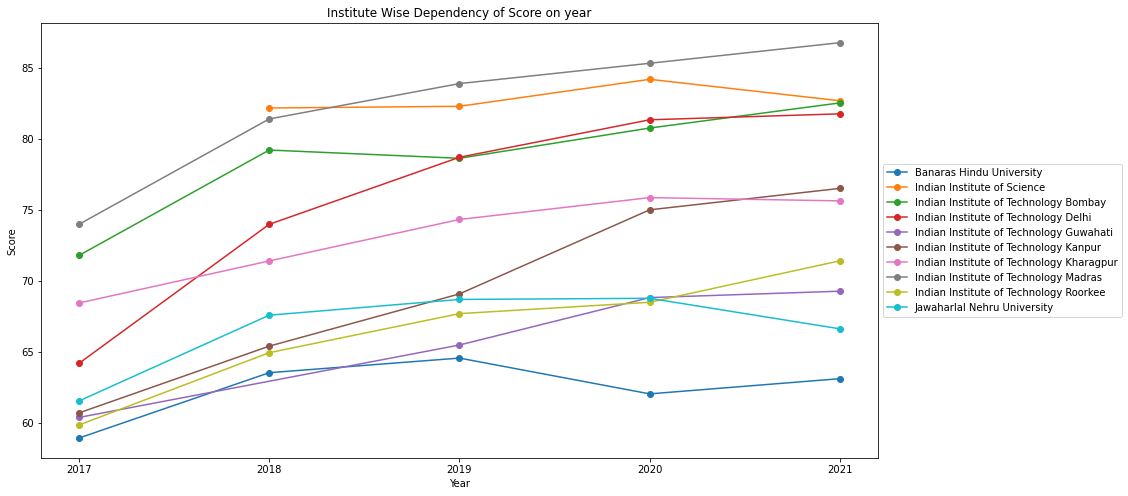

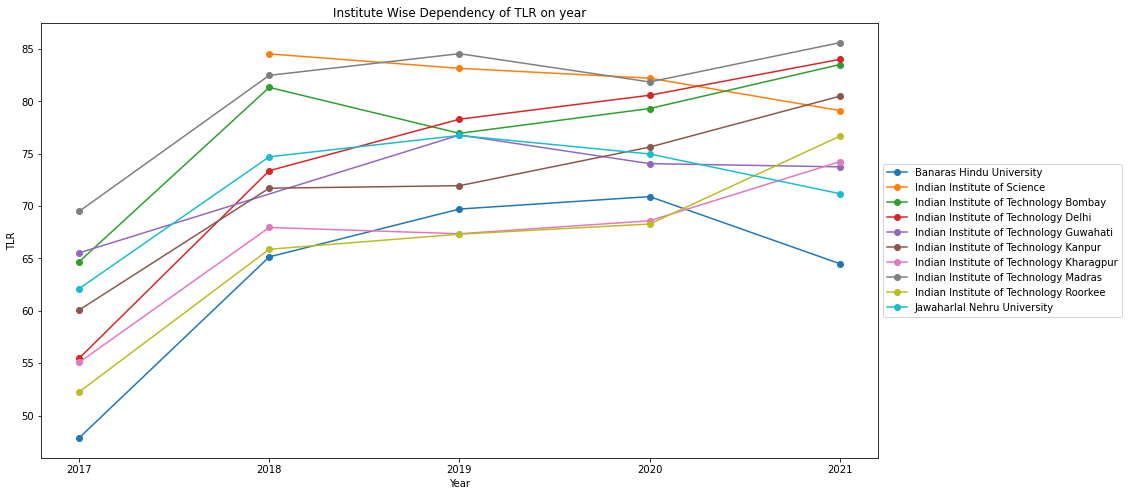

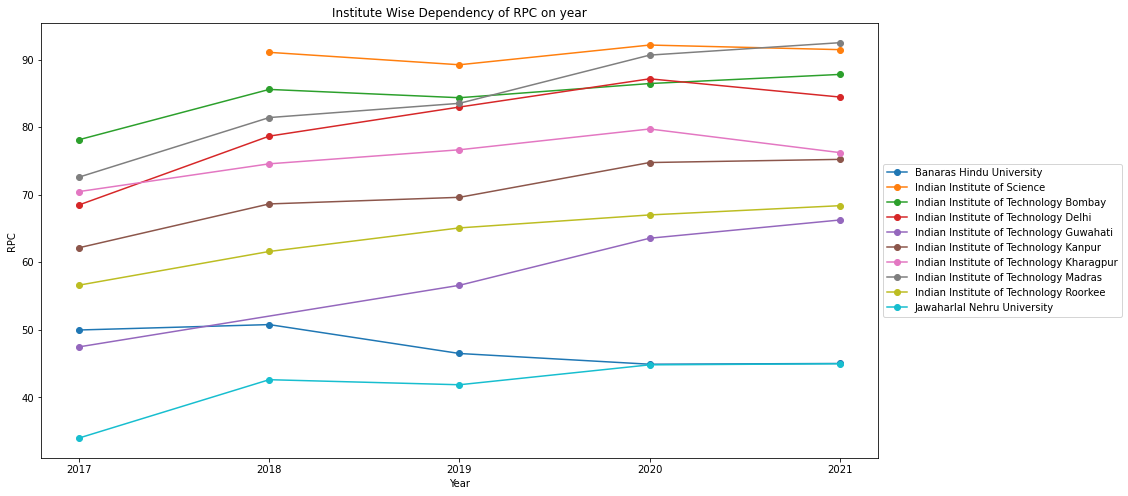

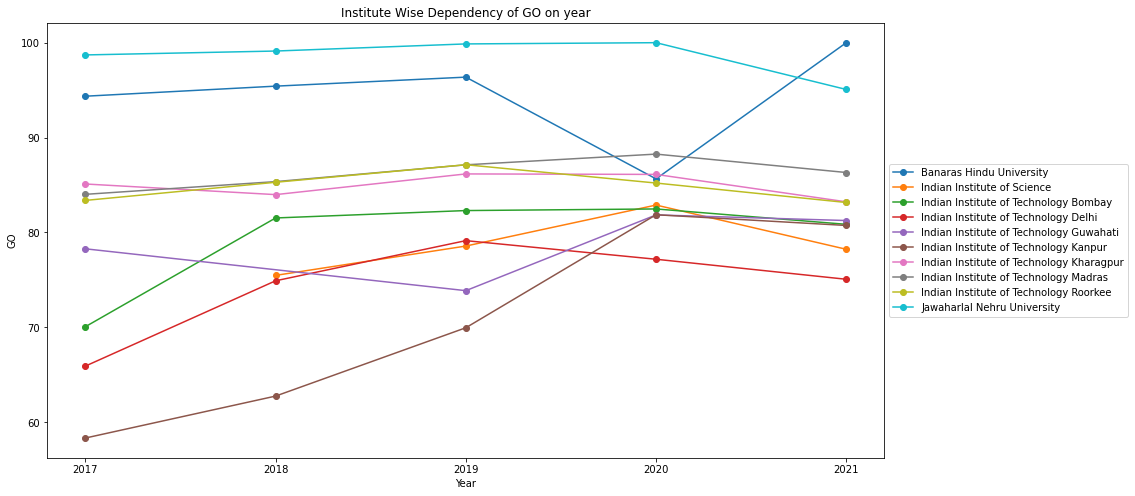

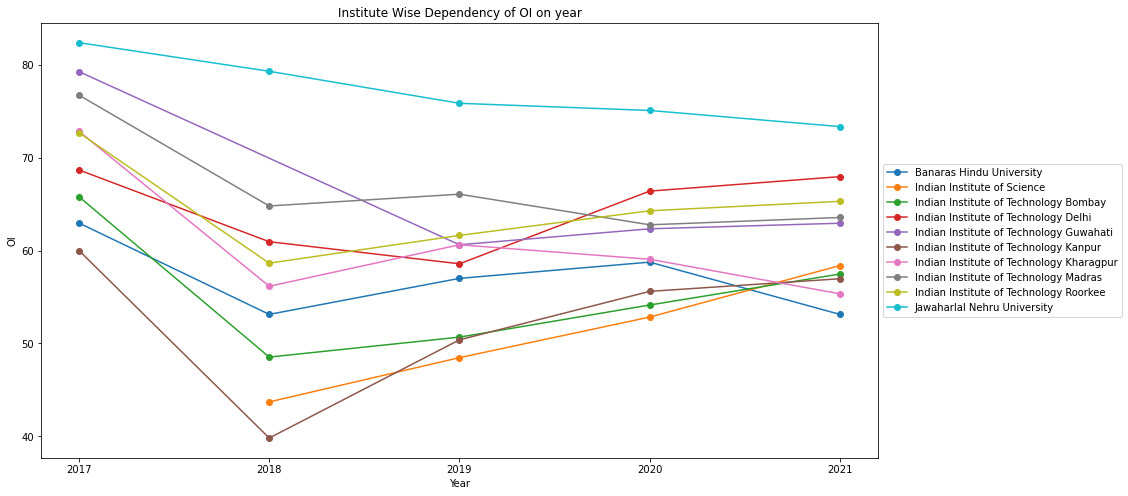

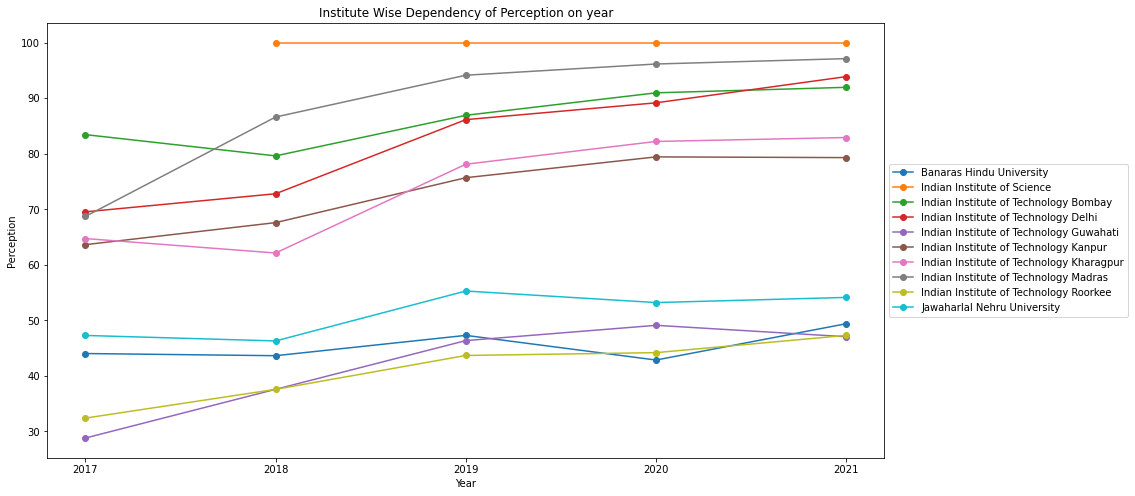

In [13]:
top102021 = list(overall['2021'].head(10)['Institute Name'])

h=['Rank','Score','TLR','RPC','GO','OI','Perception']

for val in h:
    for i,j in top10data.groupby('Institute Name'):
        if(i in top102021):
            plt.plot(j['year'],j[f'{val}'],'o-',label=f"{i}")
    plt.title(f"Institute Wise Dependency of {val} on year")
    plt.ylabel(f"{val}")
    plt.xlabel("Year")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

